### Mushroom Classification

In [45]:
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve,accuracy_score
from sklearn import datasets, metrics, model_selection, svm
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [19]:
#dirinput = "../input/mushrooms.csv"
mushrooms= pd.read_csv(dirinput,sep=",",encoding = "latin_1", decimal = ',')

In [20]:
mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [21]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [22]:
mushrooms = mushrooms.drop(["veil-type"],axis=1) #not contributing to the data so I remove it

In [23]:
mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [26]:
# The data is categorial, convert it with LabelEncoder to ordinal

labelencoder=LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])

### Plot 

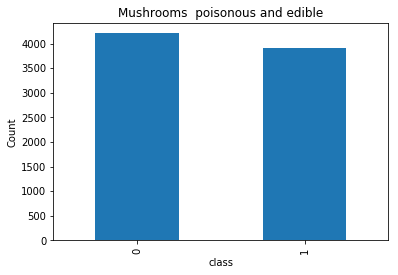

In [27]:
plt.figure()
pd.Series(mushrooms['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Mushrooms  poisonous and edible');

### Carrelaion Matrix

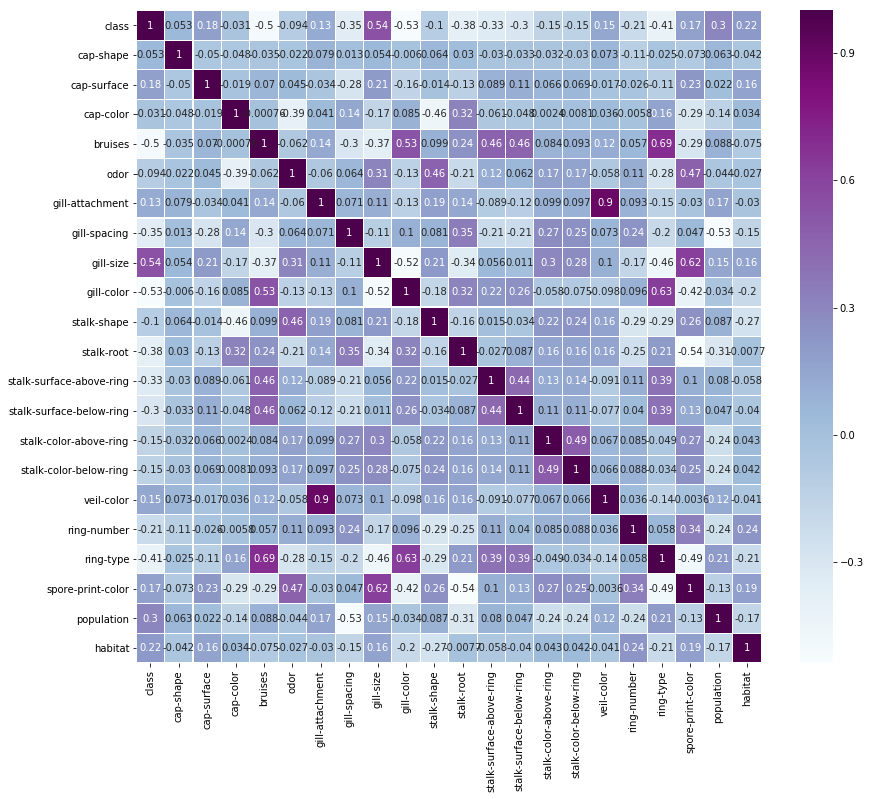

In [31]:
plt.figure(figsize=(14,12))
sns.heatmap(mushrooms.corr(),linewidths=.1,cmap="BuPu", annot=True)
plt.yticks(rotation=0);

### Model

In [35]:
X=mushrooms.drop(['class'], axis=1)
Y=mushrooms['class']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

In [36]:
mushroom_class = DecisionTreeClassifier()
mushroom_class = mushroom_class.fit(X_train, Y_train)

#### Feature IMportance

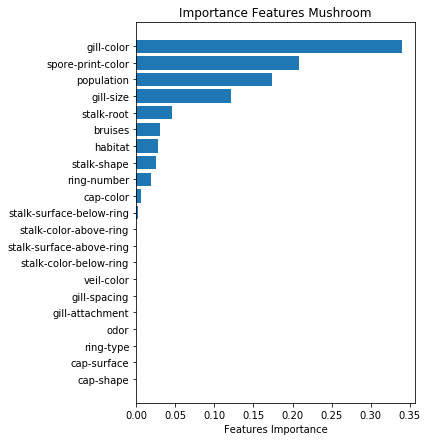

In [38]:
features_list = X.columns.values
feature_importance = mushroom_class.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Features Importance')
plt.title('Importance Features Mushroom')
plt.draw()
plt.show()

### Prediction

In [39]:
y_pred=mushroom_class.predict(X_test)

### Validation

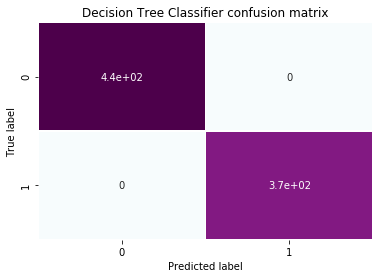

In [41]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None,cmap="BuPu")
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [43]:
print("Accuracy : "+str(accuracy_score(Y_test,y_pred)))

Accuracy : 1.0


In [54]:
preds = y_pred
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)   
print("ROC AUC : "+str(roc_auc))


ROC AUC : 1.0


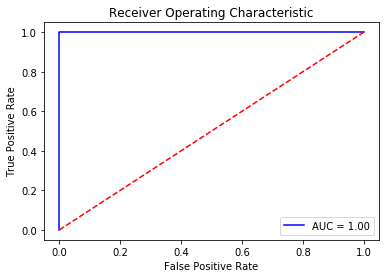

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()